Build a Score Prediction Model Using Linear Regression

In [30]:
# ======================
# IMPORT DATA FRAME
# ======================
import pandas as pd
import numpy as np

data=pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


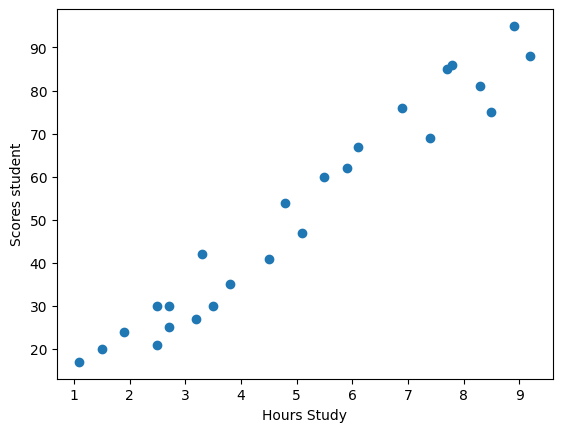

In [31]:
# ====================
# visualisation
# ====================
import matplotlib.pyplot as plt
x =data["Hours"]
y =data ["Scores"]

plt.scatter(x,y)
plt.xlabel("Hours Study")
plt.ylabel("Scores student")
plt.show()

The model shows a linear pattern.

In [16]:
from sklearn.model_selection import train_test_split
from scratch.linear_algebra import Vector,dot
import tqdm
from scratch.linear_algebra import vector_mean
from scratch.gradient_descent import gradient_step
from scratch.statistics import de_mean
# predict value
def predict (x:Vector,beta:Vector):
    assert len(x)==len(beta)
    return dot (x,beta)

def error (x:Vector,beta:Vector,y:float):
    return predict(x,beta)-y

def error_gradient (x:Vector,y:float,beta:Vector):
    err =error(x,beta,y)
    return [2*err*x_i for x_i  in x]

# Mean Absolute Error
def mae(xs:list[Vector],ys:list[Vector],beta:Vector):
    return sum(abs(error(x,beta,y))for x,y in zip (xs,ys))/len(ys)

def MSE (xs:list[Vector],ys:list[Vector],beta:Vector):
    sq_error=sum(error (x,beta,y)**2 for x,y in zip(xs,ys))
    return sq_error/len(ys)

def RMSE( xs:list[Vector],ys:list[float],beta:Vector):
    return (MSE (xs,ys,beta))**0.5

def r_squared(xs:list[Vector],ys:list[float],beta:Vector):
    sum_of_error=sum(error(x,beta,y)**2 for x,y in zip (xs,ys))
    total_sum_of_square=sum(v**2 for v in de_mean(ys))
    return 1-(sum_of_error/total_sum_of_square)

(2.4836734053731817, 9.775803390787473)


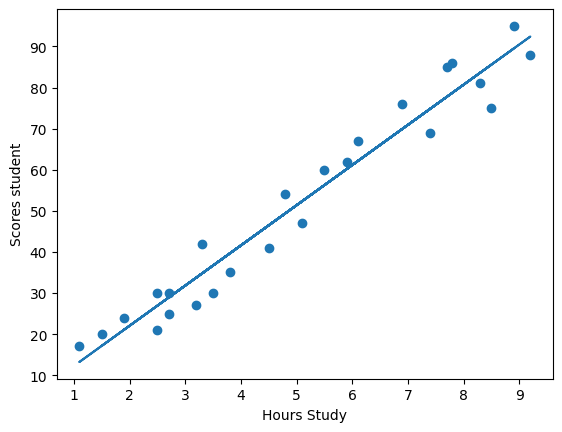

In [33]:
# =================
# Model 1 
# ================
from scratch.statistics import correlation , standard_deviation, mean
from scratch.linear_algebra import Vector

def least_squares_fit(x:Vector, y:Vector ):
    beta = correlation (x,y) * standard_deviation(y)/standard_deviation(x)
    alpha=mean(y)-beta*mean(x)
    return alpha, beta

print (least_squares_fit(x,y))
alpha,beta=least_squares_fit(x,y)

xs =[[1,i] for i in x]
y_1 =[x_i*beta+alpha for x_i in x]
plt.scatter(x,y)
plt.plot(x,y_1)
plt.xlabel("Hours Study")
plt.ylabel("Scores student")
plt.show()
beta=[alpha,beta]

In [ ]:
# ============
# value 
# ============
print ('Result Model')
print (f'mae:{mae(xs,y,beta)}')
print (f'MSE :{MSE(xs,y,beta)}')
print (f"RMSE :{RMSE(xs,y,beta)}")
print (f"SCORE :{r_squared(xs,y,beta)}")


mae:4.972805319866376
MSE :28.882730509245462
RMSE :5.374265578592619
SCORE :0.9529481969048356


In [5]:
# ================
# Build Model 2 
# ================
import random
import tqdm
from scratch.gradient_descent import gradient_step 
from scratch.linear_algebra import Vector
guess=[random.random(),random.random()]
learning_rate = 0.001
num_epoch=1000

def predict (alpha:float, beta: float, x_i: float ):
    return  beta*x_i + alpha
def error(alpha: float, beta :float, x_i:float, y_i: float):
    return predict (alpha,beta, x_i)- y_i
def sum_of_sqerror (alpha:float,beta:float, x: Vector, y : Vector):
    return sum(error(alpha, beta,x_i,y_i)**2 for x_i,y_i in zip (x,y))
    
with tqdm.trange(num_epoch)as t:
    for _ in t:
        
        alpha, beta=guess
        # 
        grad_a=sum(2*error(alpha,beta,x_i, y_i) for x_i, y_i in zip(x,y))
        grad_b=sum(2*error(alpha,beta,x_i, y_i)*x_i for x_i, y_i in zip(x,y))
        
        loss=sum_of_sqerror(alpha, beta, x,y)
        t.set_description(f"losss; {loss:3f}")
        guess=gradient_step(guess,[grad_a,grad_b],-learning_rate)

losss; 785.117958:   0%|          | 0/1000 [00:00<?, ?it/s]  

losss; 722.068263: 100%|██████████| 1000/1000 [00:07<00:00, 141.45it/s]


In [6]:
alpha, beta=guess
print ("nilai alpha :", alpha)
print ("nilai beta :" , beta)

nilai alpha : 2.4836692788099075
nilai beta : 9.775804056880574


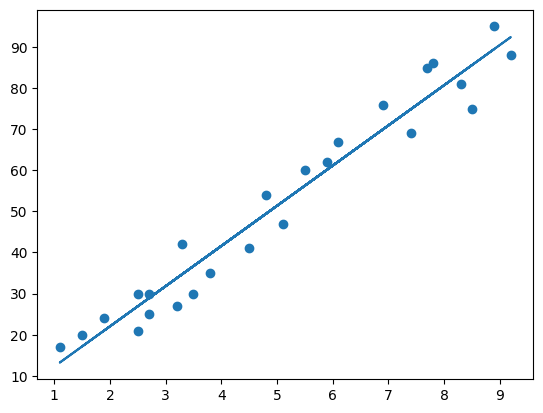

In [7]:
y1 =[x_i*beta+alpha for x_i in x]

plt.scatter(x,y)
plt.plot(x,y1)
plt.show()


In [ ]:
print ('Result Model')
print (f'mae:{mae(xs,y,beta)}')
print (f'MSE :{MSE(xs,y,beta)}')
print (f"RMSE :{RMSE(xs,y,beta)}")
print (f"SCORE :{r_squared(xs,y,beta)}")

mae:4.972805319866376
MSE :28.882730509245462
RMSE :5.374265578592619
SCORE :0.9529481969048356
